
1. Cho các điểm dữ liệu (x,y) = {(1,1), (2,3), (3, 2), (4,4), (5, 4)}.

a) Viết hàm tính MSE với model y = 2x+1.

b) Cho nhập a, b tính MSE với model y = ax+b.

c) Dùng thư viện sklearn tìm model linear regerssion phù hợp nhất, in ra các hệ số coefficient, intercep của model. Tính MSE, score https://scikit-learn.org/.../sklearn.linear_model...


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data1 = {(1,1), (2,3), (3, 2), (4,4), (5, 4)}

In [3]:
#a
def cal_MSE(data):
  data = np.array(list(data))
  x = data[:,0]
  y = data[:,1]
  y0 = np.array([2*x + 1])
  mse = np.square(np.subtract(y, y0)).mean()
  return mse

In [4]:
cal_MSE(data1)

21.4

In [5]:
#b 
def cal_MSE_ab(data, a, b):
  data = np.array(list(data))
  x = data[:,0]
  y = data[:,1]
  y0 = np.array([a*x+b])
  mse = np.square(np.subtract(y, y0)).mean()
  return mse


In [6]:
a = float(input('enter a: '))
b = float(input('enter b: '))
cal_MSE_ab(data1, a, b)

enter a: 2
enter b: 1


21.4

In [7]:
#c
data = np.array(list(data1))
x = data[:,0].reshape(-1, 1)
y = data[:,1]

In [8]:
reg_data1 = LinearRegression().fit(x, y)

In [9]:
#score 
reg_data1.score(x, y)

0.7205882352941175

In [10]:
#coefficient
reg_data1.coef_

array([0.7])

In [ ]:
#intercept
reg_data1.intercept_

0.7000000000000002

In [11]:
y1 = reg_data1.predict(x)
print("Mean squared error: %.2f" % mean_squared_error(y, y1))

Mean squared error: 0.38


2. Load file dữ liệu data_linear.csv trong mục share:

a) Visualize dữ liệu dạng scatter.

b) Dùng sklearn tìm model linear regression dự đoán giá nhà theo diện tích, in ra các hệ số, tính MSE của model.

c) Dự đoán các căn có diện tích [50, 120, 150] có giá bao nhiêu.

d) Xem việc dự đoán của model có tốt hay không, vẽ đường thẳng model trên dữ liệu scatter ở trên.


In [14]:
data_linear = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_linear.csv')

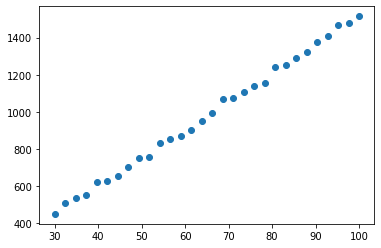

In [15]:
#a
data_linear.columns = ['area', 'price']
plt.scatter(data_linear.area, data_linear.price)

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#b
area = np.array(data_linear['area']).reshape(-1, 1)
price = np.array(data_linear['price'])

In [17]:
reg_linear = LinearRegression().fit(area, price)
reg_linear_score = reg_linear.score(area, price)
reg_linear_a = reg_linear.coef_
reg_linear_b = reg_linear.intercept_
print("Coefficients: \n", reg_linear_a)
print("Intercept: \n", reg_linear_b)

Coefficients: 
 [15.2110908]
Intercept: 
 -7.064268645244965


In [18]:
price_pred = reg_linear.predict(area)
print("Mean squared error: %.2f" % mean_squared_error(price, price_pred))

Mean squared error: 246.62


In [19]:
#c
reg_linear.predict(np.array([50,120,150]).reshape(-1, 1))

array([ 753.49027134, 1818.26662732, 2274.59935131])

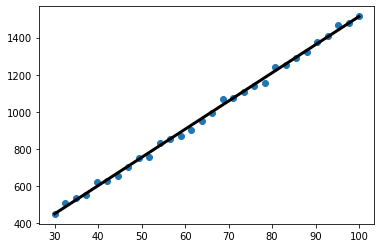

In [20]:
#d
plt.scatter(area, price)
plt.plot(area, price_pred, color = 'black', linewidth = 3)

3. Load dữ liệu file data_square.csv trong mục share

a) Visualize dữ liệu dạng scatter

b) Dùng sklearn tìm model dự đoán giá nhà theo diện tích, in ra các hệ số, tính MSE của model.

c) Model linear regression ở phần b có tốt không? Tại sao?


In [21]:
data_square = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_square.csv')

In [22]:
data_square.columns = ['area_sq', 'price_sq']

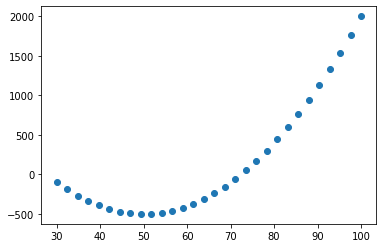

In [ ]:
#a 
plt.scatter(data_square.area_sq, data_square.price_sq)

In [23]:
#b
area_sq = np.array(data_square['area_sq']).reshape(-1, 1)
price_sq = np.array(data_square['price_sq'])
reg_sq = LinearRegression().fit(area_sq, price_sq)
reg_sq_score = reg_sq.score(area_sq, price_sq)
reg_sq_a = reg_sq.coef_
reg_sq_b = reg_sq.intercept_
print("Coefficients: ", reg_sq_a)
print("Intercept: ", reg_sq_b)
print("Score: ", reg_sq_score)
price_sq_pred = reg_sq.predict(area_sq)
print("Mean squared error: %.2f" % mean_squared_error(price_sq, price_sq_pred))

Coefficients:  [30.00003629]
Intercept:  -1788.5078219019097
Score:  0.7211363745231721
Mean squared error: 151913.45


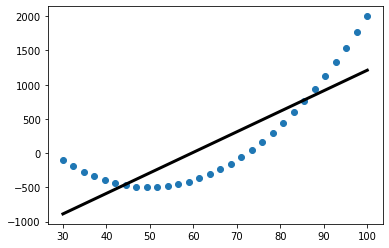

In [24]:
#c
plt.scatter(area_sq, price_sq)
plt.plot(area_sq, price_sq_pred, color = 'black', linewidth = 3)
# model không tốt vì MSE quá lớn, model không fit với data

4. Dùng dữ liệu bài 3, mình biết là model cần thiết là parabol y = ax^2 + bx + c chứ linear model không đủ tốt để mô tả dữ liệu.

a) Khi load X mình sẽ tạo thêm 1 cột X^2 cho dữ liệu, giờ thành [X, X^2] cho X, Y giữ nguyên. Dùng linear regression để fit vào model.

b) Visualize xem prediction của model có tốt hơn hay không (vẽ hàm parabol)?

In [25]:
area_sq_sq = list(np.square(data_square.area_sq))
data_square['area_sq_sq'] = area_sq_sq

In [ ]:
data_square.head()

,area_sq,price_sq,area_sq_sq
0,30.0000,-100.000,900.000000
1,32.4138,-190.725,1050.654430
2,34.8276,-269.798,1212.961722
3,37.2414,-337.218,1386.921874
4,39.6552,-392.985,1572.534887


In [26]:
area_gr = np.array(data_square.iloc[:,[0,-1]]) #data[['area_sq', 'area_sq]]
area_gr = area_gr.reshape(-1, 2)

In [ ]:
#a
reg_sq_new = LinearRegression().fit(area_gr, price_sq)
reg_sq_score_new = reg_sq_new.score(area_gr, price_sq)
reg_sq_a_new = reg_sq_new.coef_
reg_sq_b_new = reg_sq_new.intercept_
print("Coefficients: ", reg_sq_a_new)
print("Intercept: ", reg_sq_b_new)
print("Score: ", reg_sq_score_new)
price_sq_pred_new = reg_sq_new.predict(area_gr)
print("Mean squared error: %.2f" % mean_squared_error(price_sq, price_sq_pred_new))

Coefficients:  [-100.00022214    1.00000199]
Intercept:  2000.0057942500139
Score:  0.9999999999952153
Mean squared error: 0.00


In [ ]:
#b
x_plot = area_sq
y_plot = price_sq_pred_new


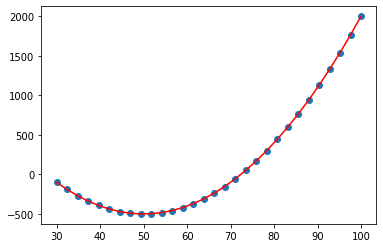

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.plot(x_plot,y_plot, 'r')
plt.scatter(area_sq, price_sq)
plt.show()